initializing
loading pkl
AskReddit
3500
[1443.  170. 1570. ... 1971.  425.  445.]
GlobalOffensive
3500
[ 55.  80. 118. ... 137. 120. 199.]
Music
3500
[ 325.   84.  161. ... 4117.  110.  382.]
Overwatch
3500
[197.  61.  84. ...  74. 150. 363.]
anime
3500
[ 99.  63.  56. ... 279. 273. 216.]
baseball
3500
[474.  54. 254. ... 134. 191.  69.]
canada
3500
[234.  45. 575. ... 423. 610. 176.]
conspiracy
3500
[ 89. 378. 165. ... 127. 156.  84.]
europe
3500
[ 88. 112.  72. ...  59.  64. 349.]
funny
3500
[212.  50.  52. ... 117.  78.  87.]
gameofthrones
3500
[ 456.  112.  119. ...   88. 1078.  119.]
hockey
3500
[357. 379.  99. ... 116. 193. 130.]
leagueoflegends
3500
[145. 231. 267. ... 297. 159.  58.]
movies
3500
[362. 230. 163. ... 589. 326.  49.]
nba
3500
[145. 128. 173. ... 848. 266.  56.]
nfl
3500
[127. 119. 203. ... 116.  62.  79.]
soccer
3500
[123. 132. 297. ... 224. 119. 149.]
trees
3500
[ 78.  82. 321. ...  79. 194.  83.]
worldnews
3500
[  79.  175.  537. ...  187. 2288.  106.]
wow
3500


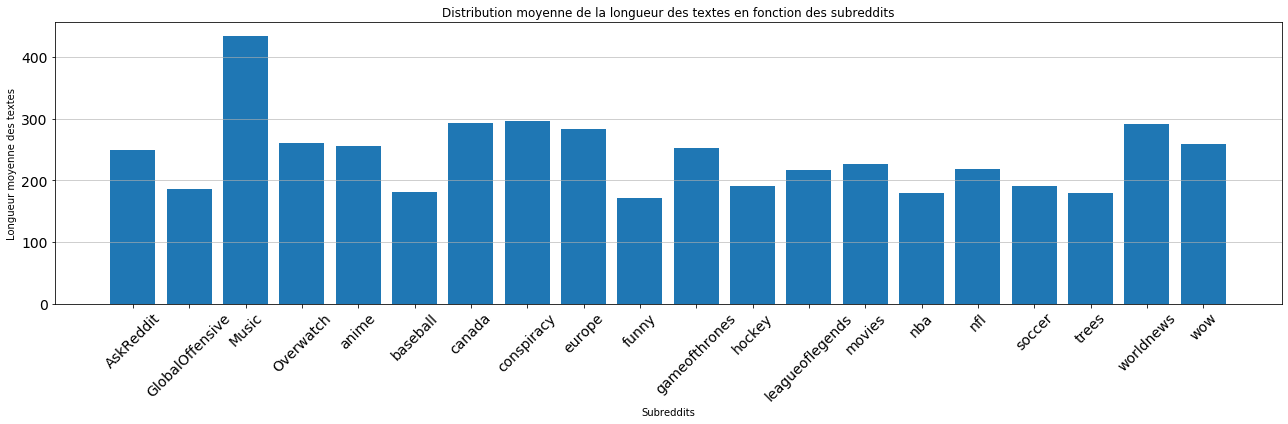

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import sklearn
from sklearn import svm
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC
import seaborn as sns
import csv
# import sys
# !{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier

train_file = 'data_train.pkl'
test_file  = 'data_test.pkl'

print("initializing")
stop_words = set(stopwords.words('english'))
count_vect = CountVectorizer(strip_accents='unicode')
tfidf_transformer = TfidfTransformer()
##tfidfvectorizer = count_vect + tfidf transformer
tfidf = TfidfVectorizer(strip_accents='unicode')
le = preprocessing.LabelEncoder()
stemmer = PorterStemmer()

print("loading pkl")
train = np.load(train_file, allow_pickle=True)
test  = np.load(test_file, allow_pickle=True)
inputs = np.asarray(train[0])
labels = np.asarray(train[1])

df = pd.DataFrame(
    {'Messages': inputs,
     'Labels': labels
    })

df_test = pd.DataFrame(
    {'Messages': test,
    })

# plt.figure(figsize=(10,4))
# df.Labels.value_counts().plot(kind='bar');

##Encode labels to numbers/integers
# le.fit(df['Labels'])
# unique_classes = np.array([le.classes_])
# labels_encoded = le.transform(df['Labels'])

# print("starting preprocessing")
# # print(df['Messages'].iloc[0]) prints first element of message

# df['Messages'] = df.Messages.map(lambda x: x.lower())
# df_test['Messages'] = df_test.Messages.map(lambda x: x.lower())
# # print(df['Messages'].iloc[0])
# print("lower finished")

# df['Messages'] = df.Messages.str.replace('[^\w\s]', '')
# df_test['Messages'] = df_test.Messages.str.replace('[^\w\s]', '')
# # print(df['Messages'].iloc[0])
# print("punctuation finished")

# df['Messages'] = df['Messages'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
# df_test['Messages'] = df_test['Messages'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
# # print("first:",df['Messages'].iloc[2])
# # print("first:",df['Messages'].iloc[3])
# # print("first:",df['Messages'].iloc[4])
# print("stopwords finished")

# df['Messages'] = df['Messages'].apply(nltk.word_tokenize)
# df_test['Messages'] = df_test['Messages'].apply(nltk.word_tokenize)
# # print(df['Messages'].iloc[0])
# # print("first:",df['Messages'].iloc[2])
# # print("first:",df['Messages'].iloc[3])
# # print("first:",df['Messages'].iloc[4])
# print("tokenize finished")

# df['Messages'] = df['Messages'].apply(lambda x: [stemmer.stem(y) for y in x])
# df_test['Messages'] = df_test['Messages'].apply(lambda x: [stemmer.stem(y) for y in x])
# # print("first:",df['Messages'].iloc[2])
# # print("first:",df['Messages'].iloc[3])
# # print("first:",df['Messages'].iloc[4])
# print("stemming finished")
# # print(df['Messages'].iloc[0])

###### Instantiating the lemmatizier and tokenizer
# The tokenizer will only keep text

# lemmatizer = WordNetLemmatizer()
# tokenizer  = RegexpTokenizer(r'\w+')

# # Setting up the lemmatizer

# lemmatized_entries = []

# for entry in df["Messages"]:
#     tokens = tokenizer.tokenize(entry)
#     entry  = [lemmatizer.lemmatize(entry) for entry in tokens]
#     lemmatized_entries.append(" ".join(entry))
    
# # Appending the lemmatized posts to the dataframe

# df["lemmatized"] = lemmatized_entries

# df["lemmatized"] = df["lemmatized"].str.replace("http\S+", "")

# print("first:",df['Messages'].iloc[2],"second:",df['lemmatized'].iloc[2])

# df['Messages'] = df['Messages'].apply(lambda x: ' '.join(x))
# df_test['Messages'] = df_test['Messages'].apply(lambda x: ' '.join(x))

# counts = count_vect.fit_transform(df['Messages'])
# counts_tfidf = tfidf_transformer.fit_transform(counts)

counts_tfidf = tfidf.fit_transform(df['Messages'])
# counts_tfidf_test = tfidf.transform(df_test['Messages'])

alpha = np.linspace(1.36,1.36,1) 
alphax = np.linspace(0.1,2,20)
lr = [0.25, 0.5, 0.75, 1]

######## Single manual cut
# X_train, X_test, y_train, y_test = train_test_split(counts_tfidf, df['Labels'], test_size=7000, random_state=3000)


#######Cross validation
# kf = KFold(n_splits=30)
# kf.get_n_splits(counts_tfidf)

# model = XGBClassifier(learning_rate = 0.1, n_estimators=100, max_depth=6, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
# scores = cross_val_score(model, counts_tfidf, df['Labels'], cv=5, scoring='accuracy')
# print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

# for train_index, test_index in kf.split(counts_tfidf):
# #         print("went in")
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = counts_tfidf[train_index], counts_tfidf[test_index]
#     y_train, y_test = df['Labels'][train_index], df['Labels'][test_index]

# #         model = XGBClassifier(learning_rate = i, n_estimators=20, max_depth=5,
# #  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
# #  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27).fit(X_train, y_train)
#     model = ComplementNB(alpha=1.15).fit(X_train, y_train)
#     predicted = model.predict(X_test)
#     print(np.mean(predicted == y_test),"\n")
#     #         print(confusion_matrix(y_test, predicted))

###Best accuracy : train index 0....20999,...,28000...69999 testing on Real testing set  cv  10
train_indexes = list(range(21000))
train_indexes.extend(list(range(28000,70000)))
test_indexes = list(range(21000,28000))

X_train_sgl = counts_tfidf[train_indexes]
y_train_sgl = df['Labels'][train_indexes]
X_test_sgl = counts_tfidf[test_indexes]
y_test_sgl = df['Labels'][test_indexes]

###Best accuracy : train index 0....14004,...,16337...69999 testing on Real testing set  cv  30
# train_indexes = list(range(14005))
# train_indexes.extend(list(range(16337,70000)))
# test_indexes = list(range(14005,16337))

# X_train_sgl = counts_tfidf[train_indexes]
# y_train_sgl = df['Labels'][train_indexes]
# X_test_sgl = counts_tfidf[test_indexes]
# y_test_sgl = df['Labels'][test_indexes]

# scores1 = []
# scores2 = []
# scores3 = []
 
# for i in alphax:
#     print("alpha=",i)
#     model1 = MultinomialNB(alpha=i).fit(X_train_sgl, y_train_sgl)
#     model2 = BernoulliNB(alpha=i).fit(X_train_sgl, y_train_sgl)
#     model3 = ComplementNB(alpha=i).fit(X_train_sgl, y_train_sgl)
#     predicted1 = model1.predict(X_test_sgl)
#     predicted2 = model2.predict(X_test_sgl)
#     predicted3 = model3.predict(X_test_sgl)
# # predicted = model.predict(counts_tfidf_test)
#     print((np.mean(predicted1 == y_test_sgl)),(np.mean(predicted2 == y_test_sgl)),(np.mean(predicted3 == y_test_sgl)))
#     scores1.append(np.mean(predicted1 == y_test_sgl)*100)
#     scores2.append(np.mean(predicted2 == y_test_sgl)*100)
#     scores3.append(np.mean(predicted3 == y_test_sgl)*100)

# scores1 = scores1;
# scores2 = scores2;
# scores3 = scores3;
# plt.plot(alphax, scores1, color='blue', label='MultinomialNB')
# plt.plot(alphax, scores2, color='red', label='BernoulliNB')
# plt.plot(alphax,scores3, color='green', label='ComplementNB')
# plt.legend(loc='best')
# plt.ylim(40, 65)
# plt.grid()
# plt.title('Score obtenu sur l\'ensemble de test \n en fonction de alpha pour les classifieurs bayesiens naifs')
# plt.xlabel('Facteur de lissage de Laplace (alpha)')
# plt.ylabel('Précision en %');

# plt.plot([0.1,0.3,0.5,0.7,1], [55.05,55.52,55.41,54.92,54.15], color='red', label='Naives Bayes')
# plt.legend(loc='best')
# plt.ylim(45, 60)
# plt.grid()
# plt.title('Score obtenu sur l\'ensemble test \n en fonction de alpha sur la première partie de la compétition')
# plt.xlabel('Facteur de lissage de Laplace (alpha)')
# plt.ylabel('Précision en %');


######Longueur des textes
length_list = [len(text) for text in df['Messages']]
longueur = np.array([])
liste_moyenne = []
uniques_labels,counts = np.unique([df["Labels"]],return_counts=True)

for label in uniques_labels:
    print(label)
    liste = zip(length_list,df["Labels"])
    for length,labell in liste:
        if labell == label:
            longueur = np.append(longueur,length)
    liste_moyenne.append(np.mean(longueur))
    print(len(longueur))
    print(longueur)
    longueur = np.array([])
    
print(liste_moyenne[0],len(liste_moyenne))

list_labels = uniques_labels.tolist()

plt.figure(figsize = (18,6))
# # Plotting the histogram
x = np.arange(20)
plt.bar(x,height=liste_moyenne)
plt.grid(axis='y', alpha=0.75)

# # Setting graph parameters
plt.xlabel('Subreddits')
plt.ylabel('Longueur moyenne des textes')
plt.title('Distribution moyenne de la longueur des textes en fonction des subreddits')
plt.xticks(x,list_labels,rotation=45,size = 14)
plt.yticks(size = 14)
plt.tight_layout()
plt.show();

# Setting the figure size

# plt.figure(figsize = (18,6))
# plt.xlim(0, 3000)
# # Plotting the histogram
# sns.distplot(length_list, kde = False, color = "blue",
#              bins = 100,hist_kws={"rwidth":0.9})

# # Setting graph parameters
# plt.title(f"Distribution sur la longueur des textes", size = 18)
# plt.xlabel("Longueur des textes en nombre de mots", size = 16)
# plt.ylabel("Frequence", size = 16)
# plt.xticks(np.arange(0,3000,200), size = 14)
# plt.yticks(size = 14)
# plt.tight_layout()
# plt.show();

#####Most common words
# def plot_most_frequent_words(dataframes, titles):
    
#     # The count inidcates where in the subplot to go
#     count = 0
#     fig   = plt.figure(figsize   = (24,20),
#                        facecolor = "white")
    
#     # Enumerating allows for the list of titles to be referenced
#     for d, dataframe in enumerate(dataframes):
        
#         # Updating the location
#         count += 1
#         ax    = fig.add_subplot(2, 2, count)
        
#         # Creating the graph
#         sns.barplot(x       = 0,
#                     y       = dataframe.index,
#                     data    = dataframe,
#                     palette = "deep")
        
#         # Setting the graph parameters
#         plt.title(f"Most Common Words From {titles[d]}", size = 20)
#         plt.xlabel("Number Of Occurences", size = 18)
#         plt.ylabel("Word", size = 18)
#         plt.xticks(size = 16)
#         plt.yticks(size = 17)




# print("Learning rate: ")
# print("Accuracy score (training): {0:.3f}".format(model.score(X_train_sgl, y_train_sgl)))
# print("Accuracy score (validation): {0:.3f}".format(model.score(X_test_sgl, y_test_sgl)))

# ##### Voting classifier
# clf1 = ComplementNB(alpha=1.1)
# clf2 = SVC(gamma='auto')
# clf3 = MultinomialNB()
# clf4 = LogisticRegression(solver='newton-cg',penalty='l2', multi_class='multinomial')
# clf5 = RandomForestClassifier(n_estimators=50)
# clf6 = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
# # clf4 = LogisticRegression()

# eclf1 = VotingClassifier(estimators=[('cnb', clf1), ('mnb', clf3), ('sgdc', clf6)], voting='hard')
# eclf1 = eclf1.fit(counts_tfidf, df['Labels'])
# predicted = eclf1.predict(counts_tfidf_test)
# print(np.mean(predicted == y_test_sgl),"\n")
# for clf, label in zip([clf1, clf3, clf6, eclf1], ['ComplementNB', 'MultinomialNB', 'SGDC', 'Ensemble']):
#     scores = cross_val_score(clf, counts_tfidf, df['Labels'],cv=10,scoring='accuracy')
#     print("Accuracy: %0.5f (+/- %0.5f) [%s]" % (scores.mean(), scores.std(), label))


###Best accuracy : ALL training set 

# X_train_sgl = counts_tfidf
# y_train_sgl = df['Labels']


####Modeling for submission
# model = ComplementNB(alpha=1.15).fit(X_train_sgl, y_train_sgl)
# predicted = model.predict(counts_tfidf_test)
# print(np.mean(predicted == y_test_sgl),"\n")

######Multi model predictions
# models = [
#     LinearSVC(),
#     MultinomialNB(alpha=0.3)
# ]
# n = 10
# n_df = pd.DataFrame(index=range(n * len(models)))
# entries = []
# for model in models:
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model,counts_tfidf, df['Labels'], scoring='accuracy', cv=CV)
#     for fold_idx, accuracy in enumerate(accuracies):
#         entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()


# ####Creating the csv submission
# preds = []
# preds_to_write=["Category"]
# all_preds = []
# ids=[]
# ids.append("Id")
# ids.extend(list(range(30000)))

# for i in predicted:
#     preds.append(i)

# preds_to_write.extend(preds)

# # print(preds_to_write[0],preds_to_write[1],ids[0],ids[1])

# with open("submission_kaggle_voting_classifier.csv", "w",newline='') as f:
#         writer = csv.writer(f)
#         writer.writerows(zip(ids,preds_to_write))

    







